In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.model_selection import train_test_split
X = dataset.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [9]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [78]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)*100
print('Accuracy Score is: %{:f}'.format(accuracy_score))

Accuracy Score is: %93.617021


In [28]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred, labels=[0,1])
print('Confusion Matrix is: \n{}'.format(cf))

Confusion Matrix is: 
[[ 65  10]
 [  2 111]]


In [43]:
from sklearn.metrics import precision_score
precision_score = precision_score(y_test, y_pred)*100
print('Precision Score is: %{:f}'.format(precision_score))

Precision Score is: %91.735537


In [41]:
from sklearn.metrics import recall_score
recall_score = recall_score(y_test, y_pred)*100
print('Recall Score is: %{:f}'.format(recall_score))

Recall Score is: %98.230088


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.97      0.87      0.92        75
      benign       0.92      0.98      0.95       113

    accuracy                           0.94       188
   macro avg       0.94      0.92      0.93       188
weighted avg       0.94      0.94      0.94       188



In [46]:
X.shape[0]

569

In [47]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [56]:
clf.feature_importances_

array([0.        , 0.08425294, 0.        , 0.        , 0.        ,
       0.        , 0.03852789, 0.        , 0.        , 0.        ,
       0.        , 0.00759842, 0.        , 0.00569882, 0.00222932,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.73397334, 0.        ,
       0.00466267, 0.0091181 , 0.10269063, 0.        , 0.01124788])

In [64]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names)
feature_importance

,0
mean radius,0.000000
mean texture,0.084253
mean perimeter,0.000000
mean area,0.000000
mean smoothness,0.000000
mean compactness,0.000000
mean concavity,0.038528
mean concave points,0.000000
mean symmetry,0.000000
mean fractal dimension,0.000000


In [59]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['mean texture',
 'mean concavity',
 'texture error',
 'area error',
 'smoothness error',
 'worst area',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst fractal dimension']

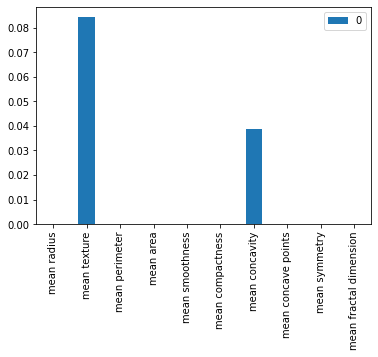

In [67]:
feature_importance.head(10).plot(kind='bar')

# Before Pruning

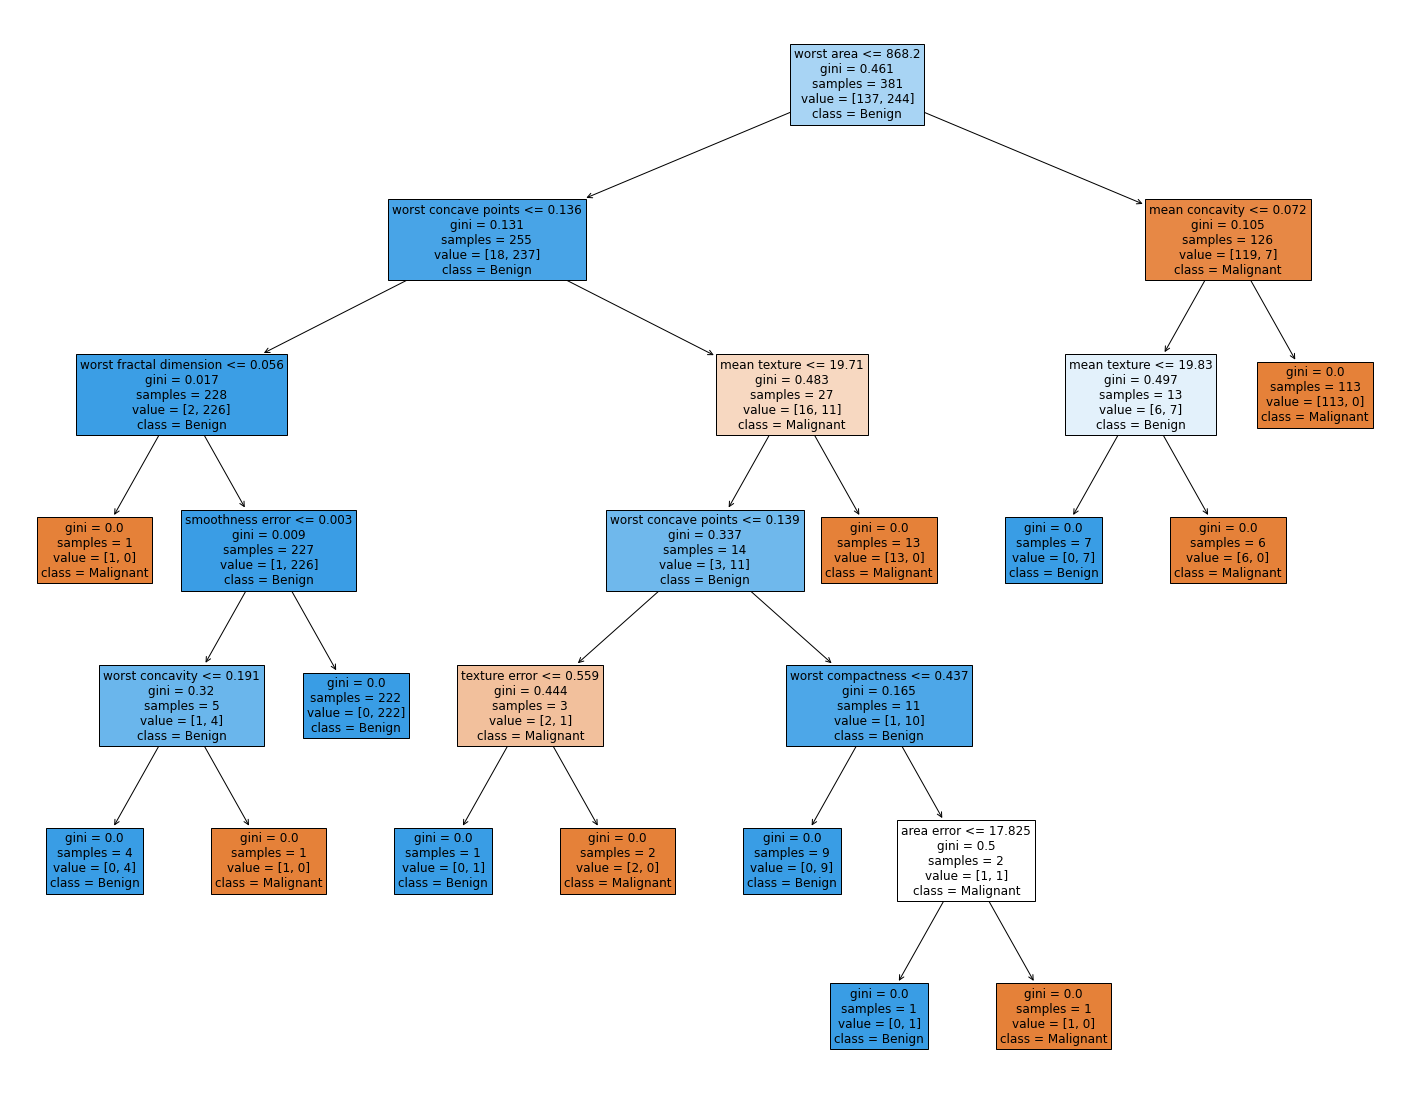

In [72]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = feature_names,
                   class_names = {0:'Malignant', 1:'Benign'},
                   filled = True,
                   fontsize = 12
                  )

# After Pruning

In [73]:
clf = DecisionTreeClassifier(ccp_alpha=0.01)  # Cost-Complexity Pruning
clf = clf.fit(X_train, y_train)

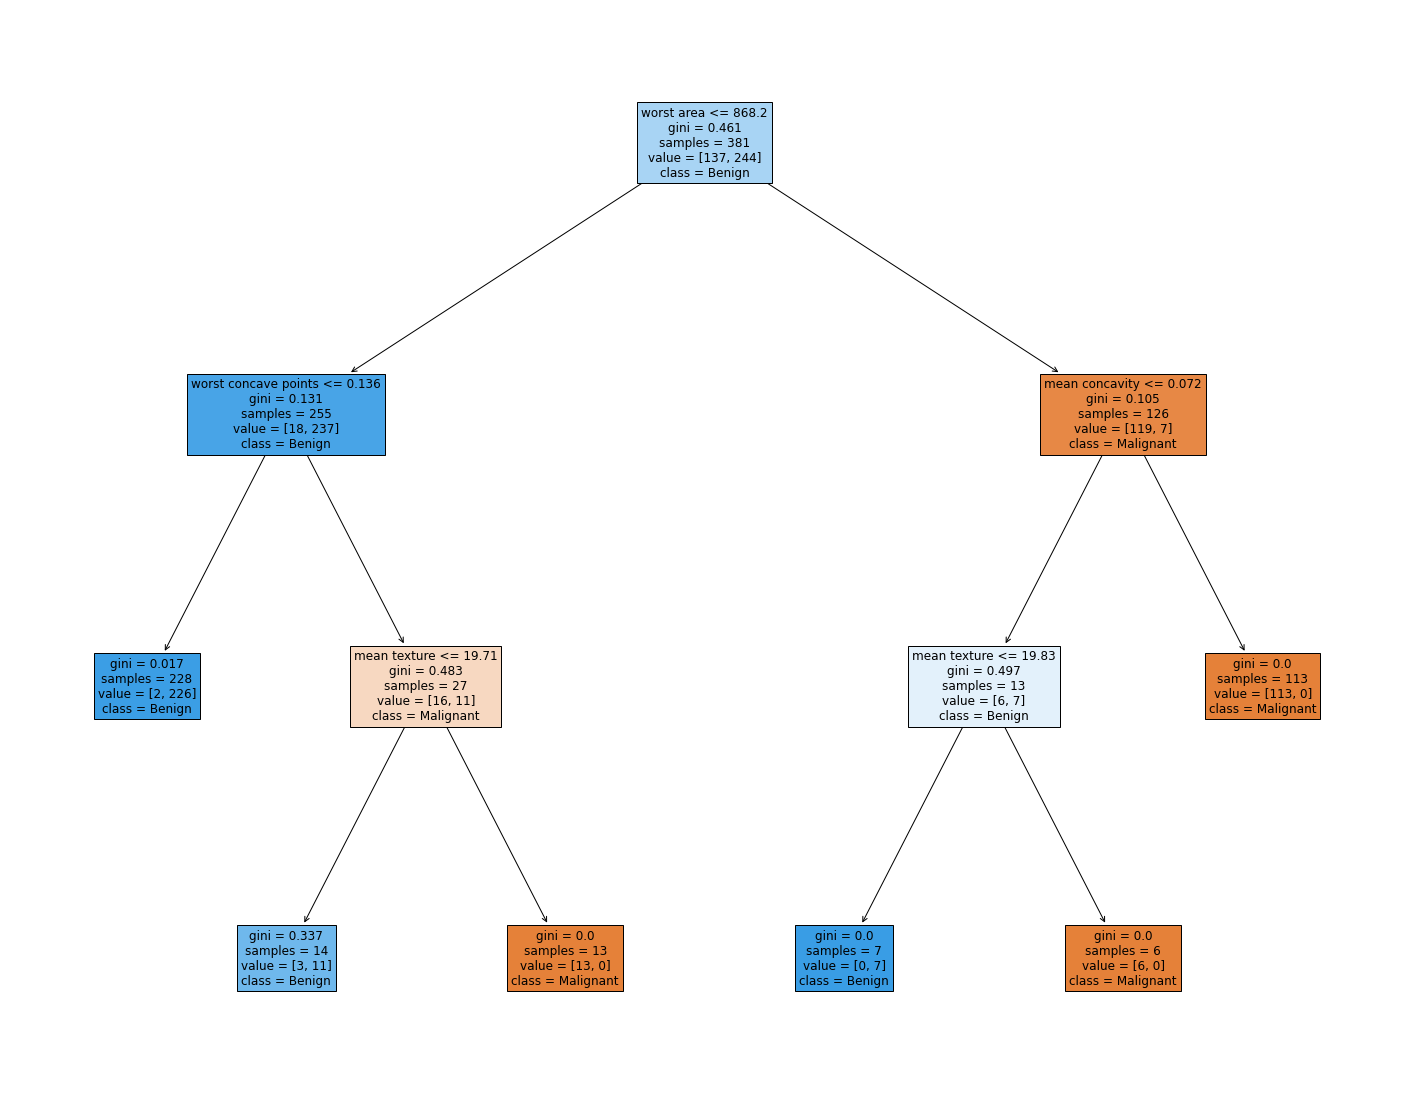

In [74]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = feature_names,
                   class_names = {0:'Malignant', 1:'Benign'},
                   filled = True,
                   fontsize = 12
                  )